<a href="https://colab.research.google.com/github/Hassaan-25/Image_Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
echo "# Image_Classification" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/Hassaan-25/Image_Classification.git
git push -u origin main

Importing

In [ ]:
!pip install ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tqdm import tqdm
import os
import random
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import math
import ipyplot
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from sklearn.metrics import f1_score



        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [ ]:
def decaying_cosine_annealing_scheduler(epoch):
    """
        A step rate scheduler for setting the learning rate for each epoch.
        :param epoch: current epoch
        :return: learning rate for current epoch
        """
    learning_rate_min = 1e-6
    original_learning_rate_max = 1e-3
    original_cycle_length = 15
    epochs_per_cycle = original_cycle_length-(int(epoch/original_cycle_length))
    learning_rate_max = original_learning_rate_max/((int(epoch/original_cycle_length))+1)
    #print(learning_rate_max,learning_rate_min, epoch, epochs_per_cycle)

    return learning_rate_min + (learning_rate_max - learning_rate_min) * \
           (1 + math.cos(math.pi * (epoch % epochs_per_cycle) / epochs_per_cycle)) / 2

Converting to NPY

In [ ]:
X=[]
Z=[]
IMG_SIZE=256

ate = '/content/drive/MyDrive/Damta/For Project/Classification/Validation/1. ATELECTASIS'
ple = '/content/drive/MyDrive/Damta/For Project/Classification/Validation/10. PLEURAL EFFUSION'
car= '/content/drive/MyDrive/Damta/For Project/Classification/Validation/2. CARDIOMEGALY'
con = '/content/drive/MyDrive/Damta/For Project/Classification/Validation/3. CONSOLIDATION'
nof = '/content/drive/MyDrive/Damta/For Project/Classification/Validation/9. NO FINDING'
ede = '/content/drive/MyDrive/Damta/For Project/Classification/Validation/4. EDEMA'


def assign_label(img,type):
    return type


def make_train_data(type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))
make_train_data('ATELECTASIS',ate)
make_train_data('CARDIOMEGALY',car)
make_train_data('CONSOLIDATION',con)
make_train_data('EDEMA',ede)
make_train_data('NO FINDING',nof)
make_train_data('PLEURAL EFFUSION',ple)
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,6)
X=np.array(X)

100%|██████████| 100/100 [00:02<00:00, 37.53it/s]


Saving NPYconverted files

In [ ]:
np.save('val_img',X)
np.save('val_label',Y)

In [ ]:
training_img_path = '/content/train_img.npy'
training_labels_path = '/content/train_label.npy'
validating_img_path = '/content/val_img.npy'
validating_labels_path = '/content/val_label.npy'


train_img, train_label, val_img, val_label = np.load(training_img_path), np.load(training_labels_path), np.load(validating_img_path), np.load(validating_labels_path) 

print('Shape of training images and training lables is: ', train_img.shape, ',', train_img.shape)
print('Shape of Validating images and Validating lables is: ', val_img.shape, ',', val_label.shape)

Shape of training images and training lables is:  (1500, 256, 256, 3) , (1500, 256, 256, 3)
Shape of Validating images and Validating lables is:  (500, 256, 256, 3) , (500, 6)



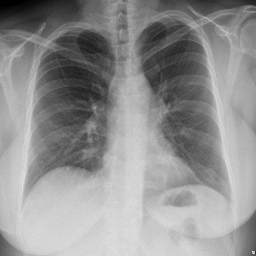
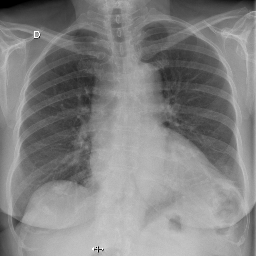
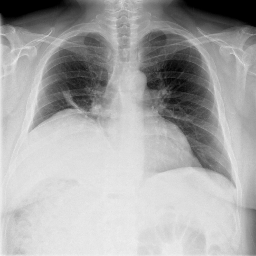
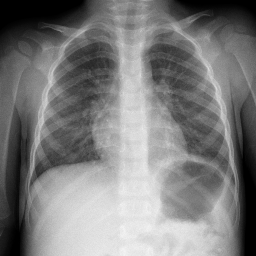
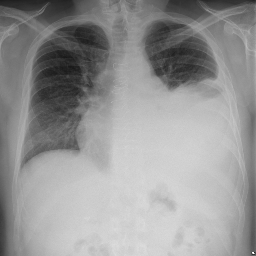
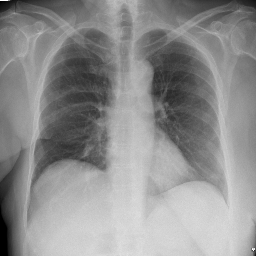
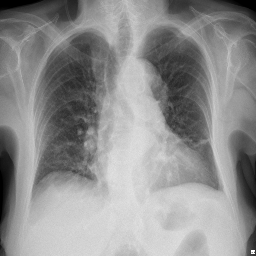
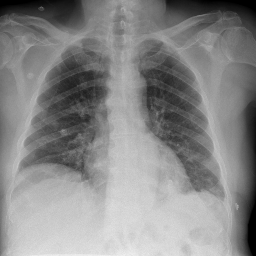
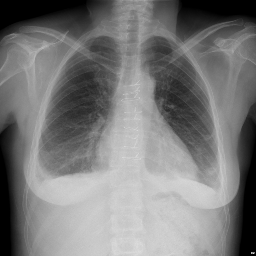
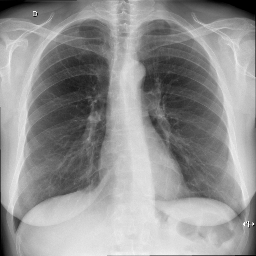


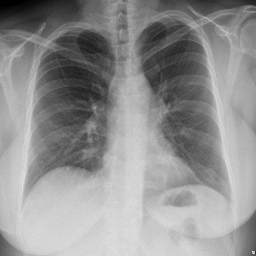
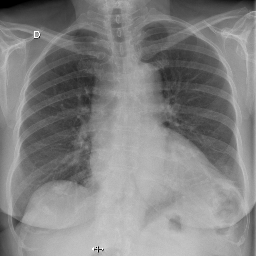
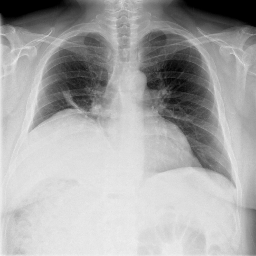
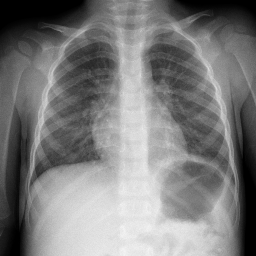
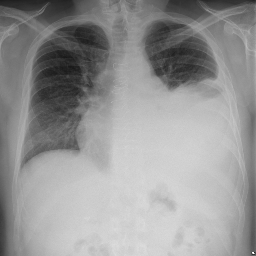
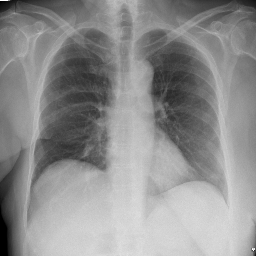
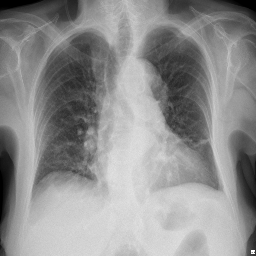
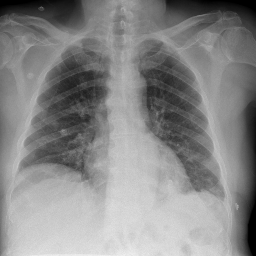
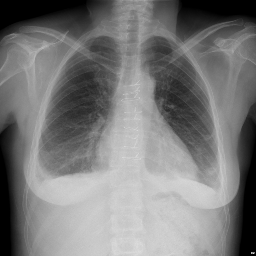
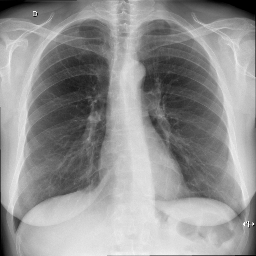

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


In [ ]:
ipyplot.plot_images(train_img[:,:,:,::-1], max_images=10, img_width=150)
print([list(x) for x in train_label[0:10,:]], sep = '     ')


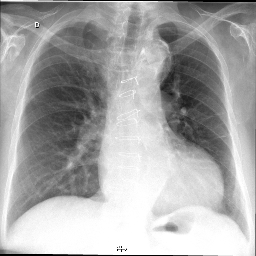
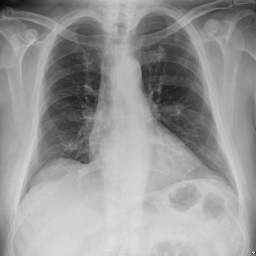
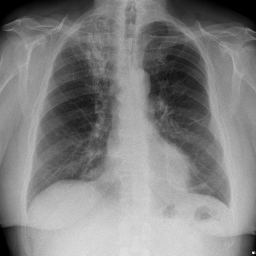
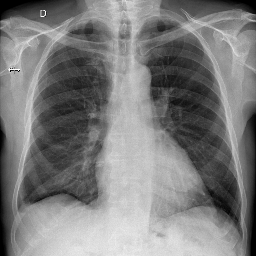
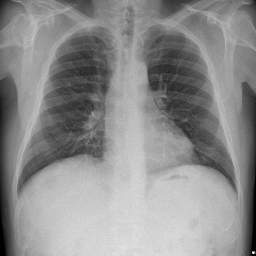
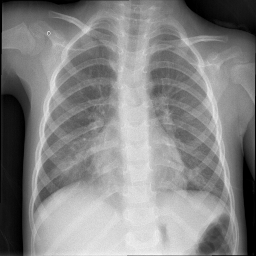
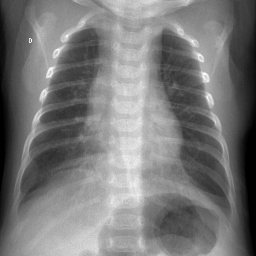
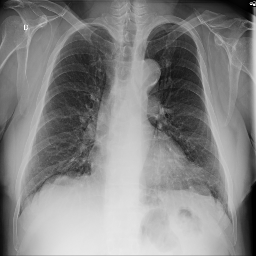
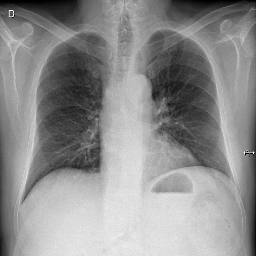
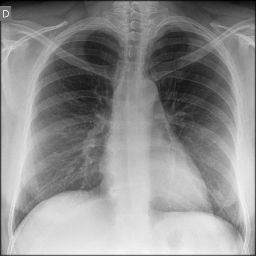


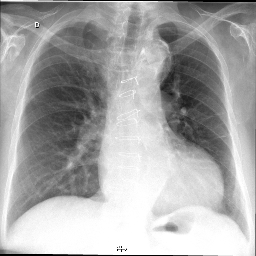
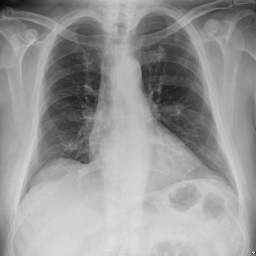
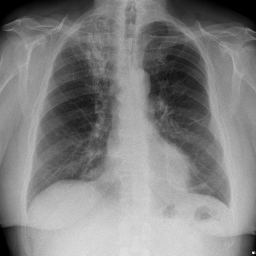
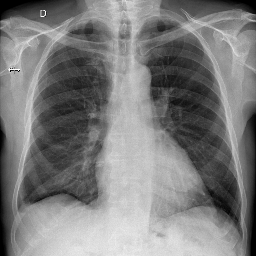
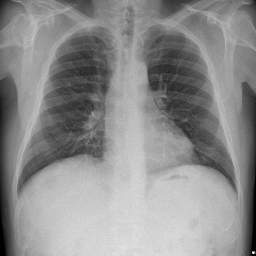
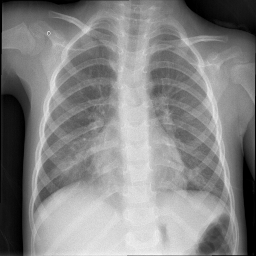
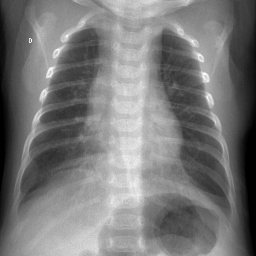
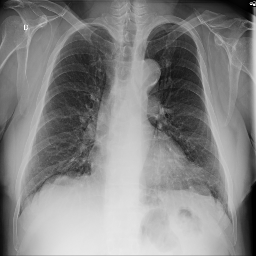
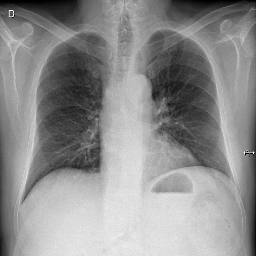
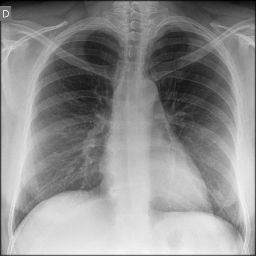

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


In [ ]:
ipyplot.plot_images(val_img[:,:,:,::-1], max_images=10, img_width=150)
print([list(x) for x in val_label[0:10,:]], sep = '      ')

In [ ]:
train_img, train_label = shuffle(train_img,train_label)

In [ ]:
model = Sequential()
#Creating the model
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
 

model.add(Conv2D(filters =32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(6, activation = "softmax"))
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 16)       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
major_revision, minor_revision = 1,1
model_save_path = '/content/drive/MyDrive/Models'
log_save_path = '/content/drive/MyDrive/Logs'

file_path = os.path.join(model_save_path, 'm%i-%i.h5' % (major_revision, minor_revision))
checkpoints_callback = tf.keras.callbacks.ModelCheckpoint(file_path, monitor= 'val_categorical_accuracy', verbose = 1, mode='max', save_best_only=True, save_freq='epoch')
    
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(decaying_cosine_annealing_scheduler, verbose=True)
    
file = open(os.path.join(log_save_path, 'log-%i-%i.txt' % (major_revision, minor_revision)),'a+')
    
text_logging_callback = tf.keras.callbacks.LambdaCallback(
on_epoch_end=lambda epoch, logs: file.write('####EPOCH %i\n' % (epoch + 1) + '#### VALIDATION ACCURACY =%.5f \n' % logs['val_categorical_accuracy'])
)
    
my_callbacks = [checkpoints_callback, learning_rate_callback, text_logging_callback]

In [ ]:
epochs = 10

print('Training...')

model_history = model.fit(x=train_img, y=train_label , epochs=epochs, validation_split = 0.1)


file.close()

Training...
Epoch 1/10
43/43 [==============================] - 76s 2s/step - loss: 88.7495 - accuracy: 0.1948 - val_loss: 1.7545 - val_accuracy: 0.1333
Epoch 2/10
43/43 [==============================] - 76s 2s/step - loss: 1.6881 - accuracy: 0.2281 - val_loss: 1.6742 - val_accuracy: 0.2600
Epoch 3/10
43/43 [==============================] - 77s 2s/step - loss: 1.6309 - accuracy: 0.2689 - val_loss: 1.6614 - val_accuracy: 0.2467
Epoch 4/10
43/43 [==============================] - 75s 2s/step - loss: 1.5928 - accuracy: 0.2933 - val_loss: 1.6734 - val_accuracy: 0.2133
Epoch 5/10
43/43 [==============================] - 74s 2s/step - loss: 1.5792 - accuracy: 0.3052 - val_loss: 1.6389 - val_accuracy: 0.2867
Epoch 6/10
43/43 [==============================] - 74s 2s/step - loss: 1.5402 - accuracy: 0.3407 - val_loss: 1.6327 - val_accuracy: 0.3200
Epoch 7/10
43/43 [==============================] - 76s 2s/step - loss: 1.5168 - accuracy: 0.3541 - val_loss: 1.6374 - val_accuracy: 0.2800
Epoch 8

(500, 6)


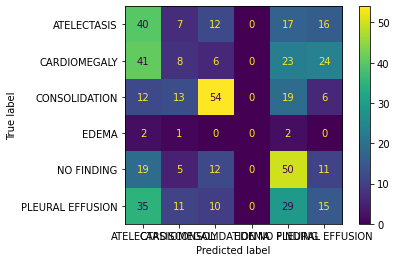

In [ ]:
my_predictions = model.predict(val_img)
print(my_predictions.shape)


cmd = ConfusionMatrixDisplay((confusion_matrix(list(np.argmax(val_label, axis=1)), list(np.argmax(my_predictions, axis=1)))), display_labels=['ATELECTASIS','CARDIOMEGALY','CONSOLIDATION','EDEMA','NO FINDING','PLEURAL EFFUSION'])
cmd.plot()
plt.show()